<a href="https://colab.research.google.com/github/zzoeys/freecakefridays/blob/main/placing_of_polling_sites.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install the required libraries.


*   The descartes library allows us to work with shapefiles [(descartes, 2017)](https://pypi.org/project/descartes/)
*   The geopandas library allows us to work with geospatial data [(GeoPandas, 2013)](https://geopandas.org/en/stable/)


*   The matplotlib library allows us to create visualizations [(Matplotlib — Visualization with Python, 2021)](https://matplotlib.org/)
*   The NumPy allows us to work with numbers in an array which helps us with our dataframes [(NumPy, 2021)](https://numpy.org/)


*   The pandas library allows us to work with data in a dataframe [(pandas - Python Data Analysis Library, 2021)](https://pandas.pydata.org/)



In [1]:
!pip install descartes
!pip install geopandas
!pip install matplotlib
!pip install numpy
!pip install pandas

     |████████████████████████████████| 1.0 MB 4.4 MB/s 
     |████████████████████████████████| 15.4 MB 59.9 MB/s 
     |████████████████████████████████| 6.3 MB 29.1 MB/s 


Import the required libraries.

In [61]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import scipy

This step reads the prepared geodataframe which is in a shapefile format.

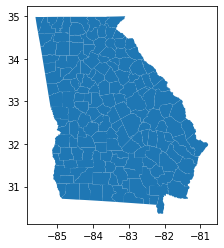

In [62]:
geoData = "/data/georgia_shapefiles_2020_county/georgia_county.shp"
county_geo = gpd.read_file(geoData) # reads the file as a geodataframe

county_geo.plot() # plots the geometry of the shapefile

In [63]:
county_geo

STATEFP  ...                                           geometry
0        13  ...  POLYGON ((-82.44998 33.34051, -82.45000 33.340...
1        13  ...  POLYGON ((-81.91012 31.34722, -81.90993 31.347...
2        13  ...  POLYGON ((-84.24837 33.07856, -84.24837 33.079...
3        13  ...  POLYGON ((-85.24134 34.41552, -85.24124 34.415...
4        13  ...  POLYGON ((-84.56317 31.77060, -84.57351 31.770...
..      ...  ...                                                ...
154      13  ...  POLYGON ((-81.66179 31.40430, -81.65878 31.408...
155      13  ...  POLYGON ((-83.39272 33.03875, -83.39273 33.038...
156      13  ...  POLYGON ((-84.38289 34.98800, -84.38279 34.988...
157      13  ...  MULTIPOLYGON (((-84.30520 31.69106, -84.30519 ...
158      13  ...  POLYGON ((-84.65478 34.66559, -84.65488 34.669...

[159 rows x 18 columns]

This step reads the previously prepared racial density data and extracts the last 5 digits of the geographical ID that identifies the county.

In [64]:
race =  pd.read_csv("/data/race_county_data/cleaned_georgia_race_county.csv") # reads the file as a CSV
race.id=race['id'].str.slice(start=-5) # extracts last 5 digits of geographical ID
race

Unnamed: 0  ... Population Density: Others
0             0  ...                   0.003578
1             1  ...                   0.006034
2             2  ...                   0.003591
3             3  ...                   0.001043
4             4  ...                   0.006484
..          ...  ...                        ...
154         154  ...                   0.004909
155         155  ...                   0.001711
156         156  ...                   0.004182
157         157  ...                   0.005182
158         158  ...                   0.005293

[159 rows x 16 columns]

This step calculates the total racial density of each race in Georgia (all counties combined).

In [65]:
print('Total Hispanic Density =', sum(race['Population Density: Hispanic']))
print('Total White Density =', sum(race['Population Density: White']))
print('Total Black Density =', sum(race['Population Density: Black']))
print('Total Asian Density =', sum(race['Population Density: Asian']))
print('Total Mixed Density =', sum(race['Population Density: Mixed']))
print('Total Others Density =', sum(race['Population Density: Others']))

Total Hispanic Density = 10.916948243885091
Total White Density = 96.83144523005893
Total Black Density = 43.22017503758957
Total Asian Density = 2.1140486226113415
Total Mixed Density = 4.997494189805859
Total Others Density = 0.9198886760492364


This step reads the previously prepared polling site density data as a CSV file and capitalizes the county names for later merging. The '2020 Quantity column is also dropped to avoid repetition with the other dataframes.

In [66]:
poll =  pd.read_csv("/data/polling_site_data/2020_clean_county_densities.csv") # reads the file as a CSV
poll['County'] = poll['County'].str.upper() # capitalizes the county name
poll = poll.drop(['2020 Quantity'], axis=1) # removes the '2020 Quantity' column
poll

Unnamed: 0         County  Total Population  Polling Site Density
0             0         FULTON           1066710              0.000369
1             1         DEKALB            764382              0.000252
2             2       GWINNETT            957062              0.000163
3             3           COBB            766149              0.000189
4             4        CHATHAM            295291              0.000312
..          ...            ...               ...                   ...
154         154         SCHLEY              4547              0.000220
155         155       STEPHENS             26784              0.000037
156         156         MILLER              6000              0.000167
157         157         ECHOLS              3697              0.000270
158         158  CHATTAHOOCHEE              9565              0.000105

[159 rows x 4 columns]

This step reads the previously prepared polling site data for 2016, 2018 and 2020, and the changes in quantity as a CSV file.

*   'Delta 18-20' represents the change in the quantity of polling sites from 2018 to 2020 in a county.
*   'Delta 16-18' represents the change in the quantity of polling sites from 2016 to 2018 in a county.
*   'Delta 16-20' represents the change in the quantity of polling sites from 2016 to 2020 in a county.

The county names are also capitalized for later merging.

In [67]:
polling_path = "/data/polling_site_data/polling_sites_in_years_changes.csv"
polling = pd.read_csv(polling_path) # reads the file as a CSV
polling['County'] = polling['County'].str.upper() #capitalizes the county names
polling

Unnamed: 0         County  ...  Delta 16-18  Delta 16-20
0             0         FULTON  ...           18           30
1             1         DEKALB  ...            0            2
2             2       GWINNETT  ...            0            0
3             3           COBB  ...           -4            0
4             4        CHATHAM  ...            1            3
..          ...            ...  ...          ...          ...
154         154         SCHLEY  ...            0            0
155         155       STEPHENS  ...            0            0
156         156         MILLER  ...            0            0
157         157         ECHOLS  ...            0            0
158         158  CHATTAHOOCHEE  ...            0            0

[159 rows x 8 columns]

This step calculates the overall total change in the number of polling sites with all the counties combined from 2018 to 2020, 2016 to 2018, and 2016 to 2020.

In [68]:
print('Total change 2018-2020 =', sum(polling['Delta 18-20']))
print('Total change 2016-2018 =', sum(polling['Delta 16-18']))
print('Total change 2016-2020 =', sum(polling['Delta 16-20']))

Total change 2018-2020 = 23
Total change 2016-2018 = -41
Total change 2016-2020 = -18


This step merges the geodataframe and the CSV dataframe with the racial density. It merges on the geographical ID. The county names are also capitalized for later merging.

In [69]:
merged = county_geo.merge(race, how='left', left_on="GEOID", right_on="id")
merged['NAME'] = merged['NAME'].str.upper()
merged

STATEFP COUNTYFP  ... Population Density: Mixed Population Density: Others
0        13      189  ...                  0.028199                   0.004392
1        13      025  ...                  0.038400                   0.004550
2        13      171  ...                  0.033838                   0.003514
3        13      115  ...                  0.036091                   0.005944
4        13      273  ...                  0.021666                   0.002504
..      ...      ...  ...                       ...                        ...
154      13      127  ...                  0.034474                   0.007326
155      13      009  ...                  0.023448                   0.006484
156      13      111  ...                  0.034520                   0.005648
157      13      177  ...                  0.033381                   0.004945
158      13      123  ...                  0.031480                   0.004593

[159 rows x 34 columns]

This step merges the merged geodataframe and the CSV dataframe with the 'polling' dataframe with the quantity of polling sites in 2016, 2018 and 2020, and the changes in polling sites, and the polling site density dataframe named 'poll'. It merges on the capitalized county name.

In [70]:
complete = merged.merge(polling, how='left', left_on="NAME", right_on="County")
complete = complete.merge(poll, how='left', left_on="NAME", right_on="County")

# filters the columns and only the listed columns remain in the dataframe.
complete = complete[['GEOID', 'NAME', '2016 Quantity', '2018 Quantity', '2020 Quantity', 
                 'Delta 18-20', 'Delta 16-18', 'Delta 16-20', 'Polling Site Density',
                 'Population Density: Hispanic', 'Population Density: White', 'Population Density: Black',
                 'Population Density: Asian', 'Population Density: Mixed', 'Population Density: Others', 'geometry']]
complete

GEOID  ...                                           geometry
0    13189  ...  POLYGON ((-82.44998 33.34051, -82.45000 33.340...
1    13025  ...  POLYGON ((-81.91012 31.34722, -81.90993 31.347...
2    13171  ...  POLYGON ((-84.24837 33.07856, -84.24837 33.079...
3    13115  ...  POLYGON ((-85.24134 34.41552, -85.24124 34.415...
4    13273  ...  POLYGON ((-84.56317 31.77060, -84.57351 31.770...
..     ...  ...                                                ...
154  13127  ...  POLYGON ((-81.66179 31.40430, -81.65878 31.408...
155  13009  ...  POLYGON ((-83.39272 33.03875, -83.39273 33.038...
156  13111  ...  POLYGON ((-84.38289 34.98800, -84.38279 34.988...
157  13177  ...  MULTIPOLYGON (((-84.30520 31.69106, -84.30519 ...
158  13123  ...  POLYGON ((-84.65478 34.66559, -84.65488 34.669...

[159 rows x 16 columns]

A function is defined to calculate the center point of a polygon shape. This means that the center point of a county is calculated from the 'geometry' column. This process converts to the polygon geometry to a planar coordinate reference system (CRS), calculates the centroid point, and then converts the point back to the original CRS which is the CRS of the 'complete' dataframe.

This function defines where the points will be located on the bubble map. The method for developing bubble maps is from the following source: [(Coderzcolumn.com., 2021)](https://coderzcolumn.com/tutorials/data-science/geoplot-scatter-and-bubble-maps-python)

In [71]:
def calculate_center(df):

    original_crs = complete.crs
    planar_crs = 'EPSG:3857'
    return complete['geometry'].to_crs(planar_crs).centroid.to_crs(original_crs)

complete["center"] = calculate_center(complete)

complete.head()

GEOID  ...                      center
0  13189  ...  POINT (-82.48144 33.48298)
1  13025  ...  POINT (-81.98184 31.19698)
2  13171  ...  POINT (-84.13947 33.07661)
3  13115  ...  POINT (-85.21423 34.26338)
4  13273  ...  POINT (-84.43694 31.77700)

[5 rows x 17 columns]

This step creates a dataframe which drops the original 'geometry' column of the 'complete' dataframe, and renames the 'center' column to 'geometry'. This means that the geodataframe recognizes the centroid point as the 'geometry' of the county. This center point is where the points will be located on the bubble map.

In [72]:
bubble = complete.drop(columns=["geometry"]).rename(columns={"center": "geometry"})
bubble.head()

GEOID      NAME  ...  Population Density: Others                    geometry
0  13189  MCDUFFIE  ...                    0.004392  POINT (-82.48144 33.48298)
1  13025  BRANTLEY  ...                    0.004550  POINT (-81.98184 31.19698)
2  13171     LAMAR  ...                    0.003514  POINT (-84.13947 33.07661)
3  13115     FLOYD  ...                    0.005944  POINT (-85.21423 34.26338)
4  13273   TERRELL  ...                    0.002504  POINT (-84.43694 31.77700)

[5 rows x 16 columns]

This step creates dataframes that distinguishes between the counties which have an increase in polling sites, and counties which have a decrease in polling sites. To be able to view the bubble map at a visible scale, the size of the markers is equal to the change in the number of polling sites times a factor of 30. 


*   'decrease1820' and 'increase1820' are the dataframes of the change in polling sites from 2018 to 2020.
*   'decrease1618' and 'increase1618' are the dataframes of the change in polling sites from 2016 to 2018.
*   'decrease1620' and 'increase1620' are the dataframes of the change in polling sites from 2016 to 2020.





In [73]:
decrease1820 = bubble[bubble['Delta 18-20']>0]
decrease1820['decrease marker'] = decrease1820['Delta 18-20']*30
increase1820 = bubble[bubble['Delta 18-20']<0]
increase1820['increase marker'] = increase1820['Delta 18-20']*(-30)

decrease1618 = bubble[bubble['Delta 16-18']>0]
decrease1618['decrease marker'] = decrease1618['Delta 16-18']*30
increase1618 = bubble[bubble['Delta 16-18']<0]
increase1618['increase marker'] = increase1618['Delta 16-18']*(-30)

decrease1620 = bubble[bubble['Delta 16-20']>0]
decrease1620['decrease marker'] = decrease1620['Delta 16-20']*30
increase1620 = bubble[bubble['Delta 16-20']<0]
increase1620['increase marker'] = increase1620['Delta 16-20']*(-30)

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

This step creates a dataframe called 'density' which has the polling site density in 2020 and a new column called 'marker' is calculated which multiplies the polling site density by a factor of 100000 to make the bubble map visible. The size of the marker is proportionate to the polling site density in a county in 2020.

In [74]:
density = bubble[['NAME', 'Polling Site Density', 'geometry']]
density['marker'] = density['Polling Site Density']*100000
density

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


NAME  Polling Site Density                    geometry     marker
0    MCDUFFIE              0.000416  POINT (-82.48144 33.48298)  41.605030
1    BRANTLEY              0.000166  POINT (-81.98184 31.19698)  16.647245
2       LAMAR              0.000324  POINT (-84.13947 33.07661)  32.432432
3       FLOYD              0.000254  POINT (-85.21423 34.26338)  25.359085
4     TERRELL              0.000653  POINT (-84.43694 31.77700)  65.323898
..        ...                   ...                         ...        ...
154     GLYNN              0.000237  POINT (-81.49376 31.21343)  23.668919
155   BALDWIN              0.000320  POINT (-83.24960 33.06934)  31.964200
156    FANNIN              0.000474  POINT (-84.31994 34.86426)  47.395237
157       LEE              0.000302  POINT (-84.14112 31.77963)  30.154087
158    GILMER              0.000415  POINT (-84.45563 34.69130)  41.463337

[159 rows x 4 columns]

This step uses the Seaborn library to develop a colormap of blue to red.

The method to develop the required scale using the Seaborn library was learned from the following source: [(Seaborn.pydata.org., 2020)](https://seaborn.pydata.org/generated/seaborn.diverging_palette.html#seaborn.diverging_palette)

In [75]:
redblue = sns.diverging_palette(10, 240, center='light', as_cmap=True)

This step plots a bivatriate choropleth map representing the white and black racial density distribution.

The method for developing choropleth maps was further learned from the following source: [(Linggar, 2019)](https://towardsdatascience.com/a-beginners-guide-to-create-a-cloropleth-map-in-python-using-geopandas-and-matplotlib-9cc4175ab630)

The method for developing bivariate choropleth maps was learned from the following source: [(Campus.datacamp.com., 2019)](https://campus.datacamp.com/courses/analyzing-us-census-data-in-python/american-community-survey?ex=12)

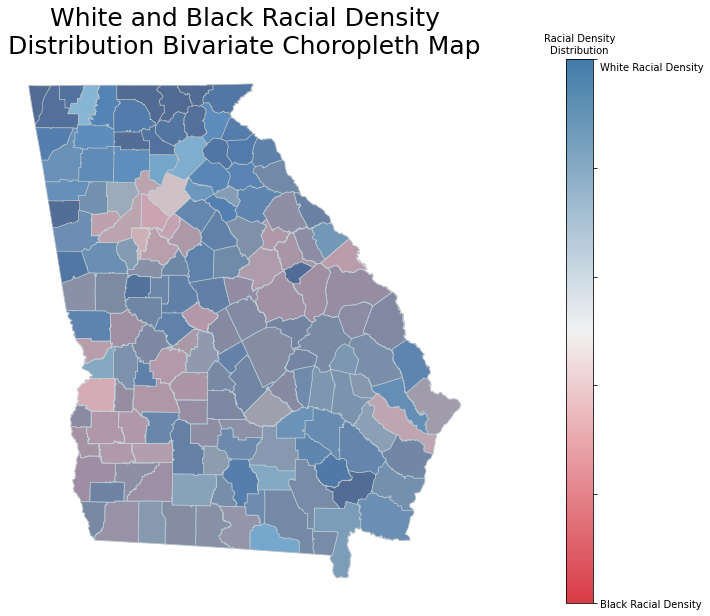

In [76]:
# creates figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))
# removes the axis
ax.axis('off')
# adds title
ax.set_title('White and Black Racial Density\nDistribution Bivariate Choropleth Map', fontdict={'fontsize': '25', 'fontweight' : '3'})
# creates colorbar legend
sm = plt.cm.ScalarMappable(cmap=redblue)
# adds the colorbar to the figure and add labels
colorbar=fig.colorbar(sm)
colorbar.ax.set_title('Racial Density\nDistribution',fontsize=10)
colorbar.ax.set_yticklabels(['Black Racial Density', '', '', '', '', '\nWhite Racial Density'])
# creates map
complete.plot(column='Population Density: Black', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', alpha=1)
complete.plot(column='Population Density: White', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', alpha=0.7)
# saves the plot as an image file
plt.savefig('bivariate.jpg')

This step uses a for loop to plot each individual racial density choropleth map (Hispanic, White, Black, Asian, Mixed, and Others).

The scale of the colour map scale (the shades) are normalized from 0 to 1 so that maps with an overall low racial density can be viewed.

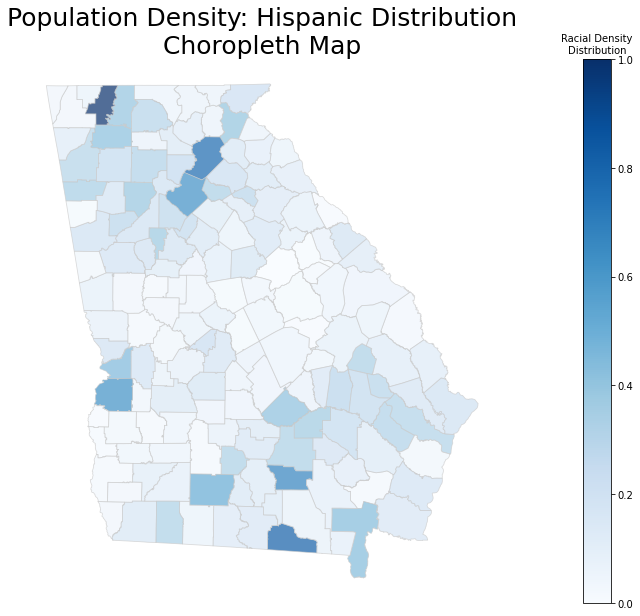

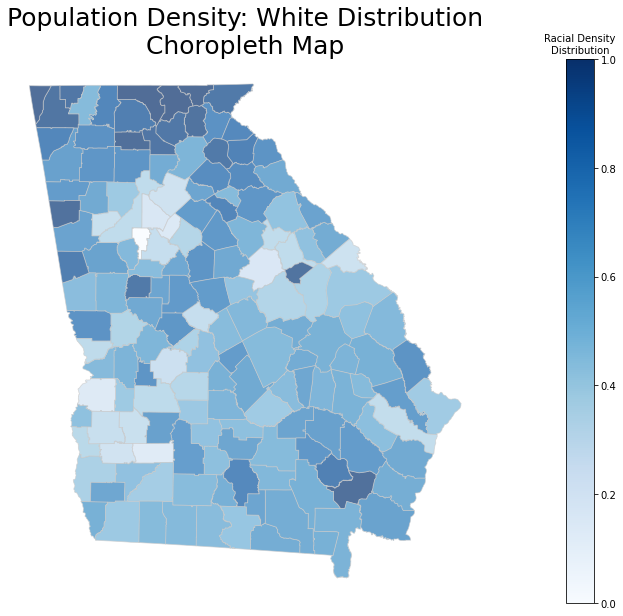

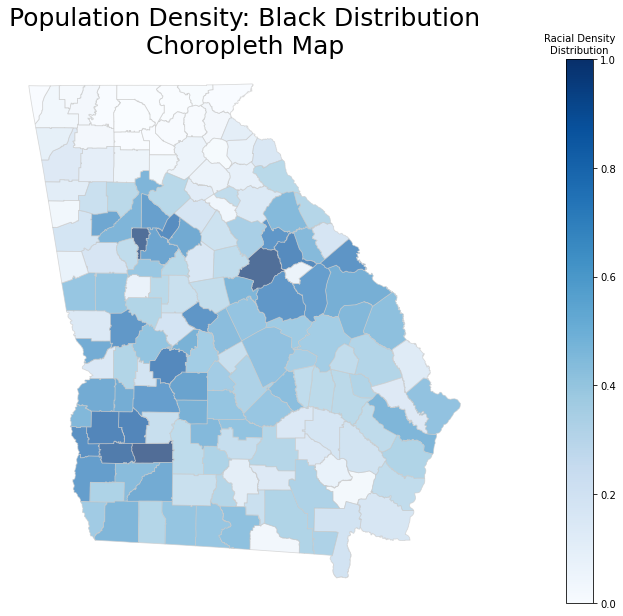

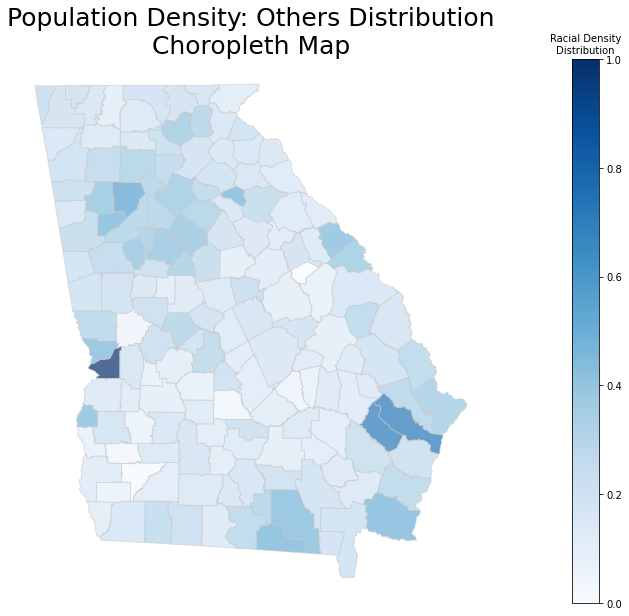

In [77]:
for i in ['Population Density: Hispanic', 'Population Density: White', 'Population Density: Black', 'Population Density: Asian', 'Population Density: Mixed', 'Population Density: Others']:
  fig, ax = plt.subplots(1, figsize=(30, 10))
  ax.axis('off')
  ax.set_title(i+ ' Distribution\nChoropleth Map', fontdict={'fontsize': '25', 'fontweight' : '3'})

  # this step also normalizes the scale of the colour map from 0 to 1.
  sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=1))
  fig.colorbar(sm).ax.set_title('Racial Density\nDistribution',fontsize=10)
  complete.plot(column=i, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', alpha=0.7)

This step plots a bubble map with the quantity of polling sites in 2020 over a bivariate map representing the white and black racial density distribution. The size of each marker is proportionate to the quantity of polling sites in the county.

The method for adding a legend for the bubble map markers was learned from the following source: [(VanderPlas, 2016)](https://jakevdp.github.io/PythonDataScienceHandbook/04.06-customizing-legends.html)

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning


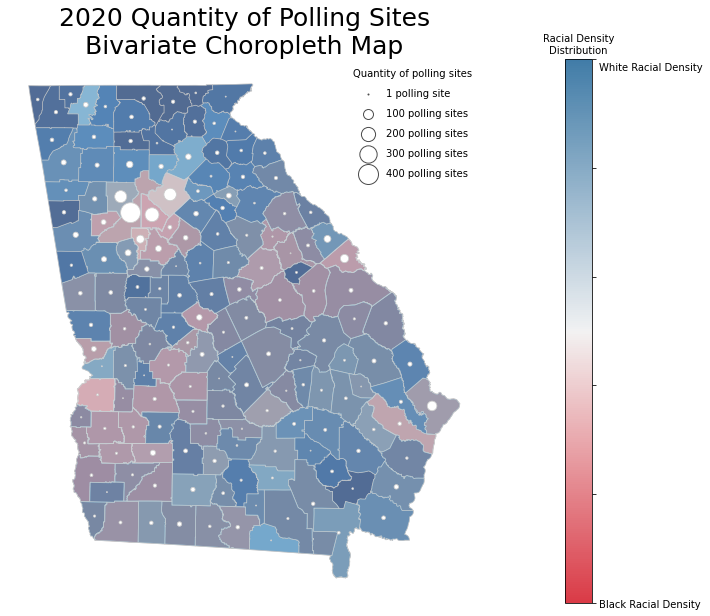

In [78]:
# repeats the previous method to plot the bivariate map.
fig, ax = plt.subplots(1, figsize=(30, 10))
ax.axis('off')
ax.set_title('2020 Quantity of Polling Sites\nBivariate Choropleth Map', fontdict={'fontsize': '25', 'fontweight' : '3'})
sm = plt.cm.ScalarMappable(cmap=redblue)
colorbar=fig.colorbar(sm)
colorbar.ax.set_title('Racial Density\nDistribution',fontsize=10)
colorbar.ax.set_yticklabels(['Black Racial Density', '', '', '', '', '\nWhite Racial Density'])
complete.plot(column='Population Density: Black', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', alpha=1)
complete.plot(column='Population Density: White', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', alpha=0.7)

''' overlays a bubble map on to the bivariate choropleth map by adding a 
marker at the center point of a county and the size is 
proportionate to the quantity of polling sites.'''

bubble.plot(column='2020 Quantity', marker='o', color='white', markersize='2020 Quantity', linewidth=0.8, ax=ax, edgecolor='0.8')

# creates legend for bubble map
plt.scatter([], [], color='white', edgecolor='0.3', s=1, alpha=1, label='1 polling site')
plt.scatter([], [], color='white', edgecolor='0.3', s=100, alpha=1, label='100 polling sites')
plt.scatter([], [], color='white', edgecolor='0.3', s=200, alpha=1, label='200 polling sites')
plt.scatter([], [], color='white', edgecolor='0.3', s=300, alpha=1, label='300 polling sites')
plt.scatter([], [], color='white', edgecolor='0.3', s=400, alpha=1, label='400 polling sites')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Quantity of polling sites')

This step plots the previous bubble map of the quantity of polling sites in 2020 over each racial density choropleth map (Hispanic, White, Black, Asian, Mixed, and Others) using a for loop.

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' o

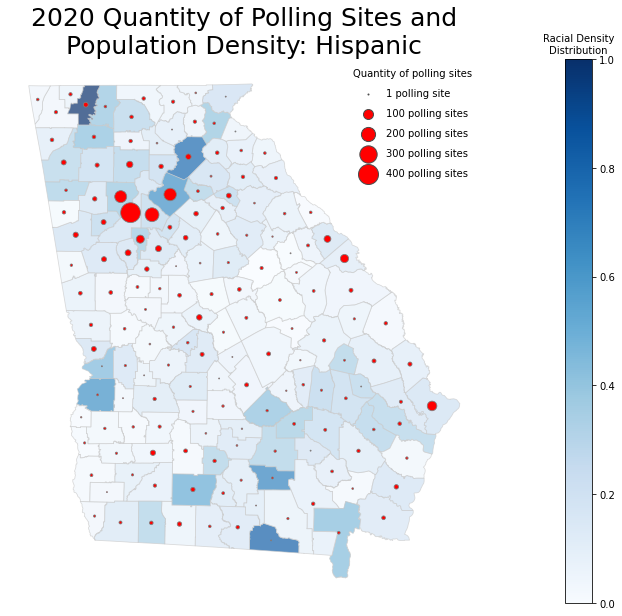

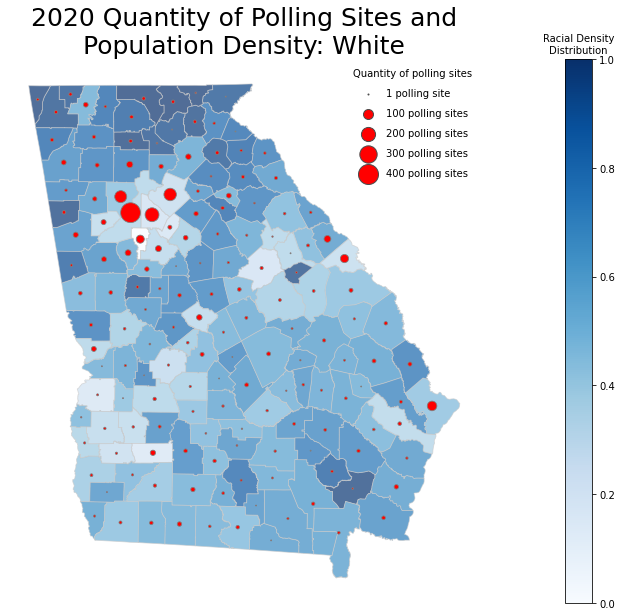

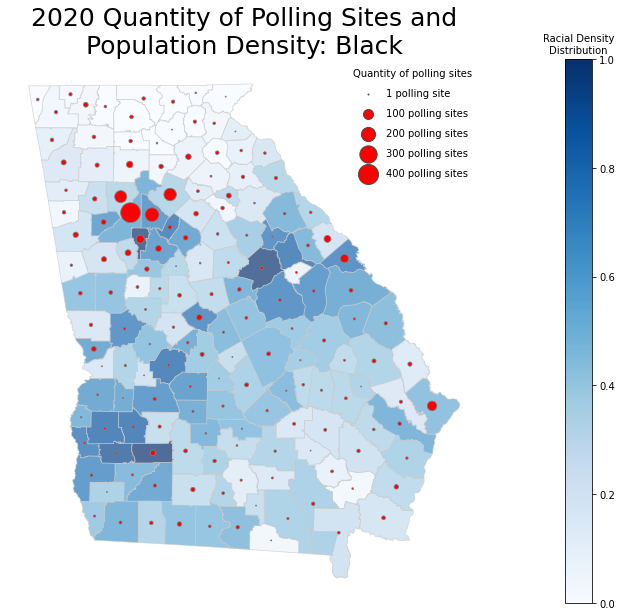

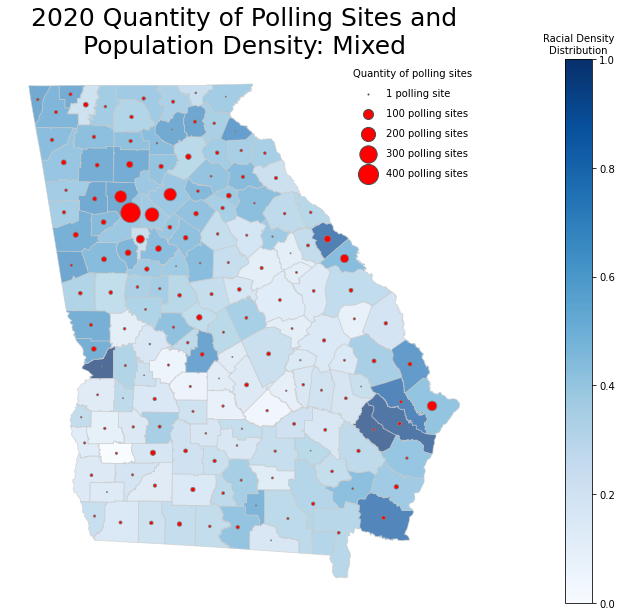

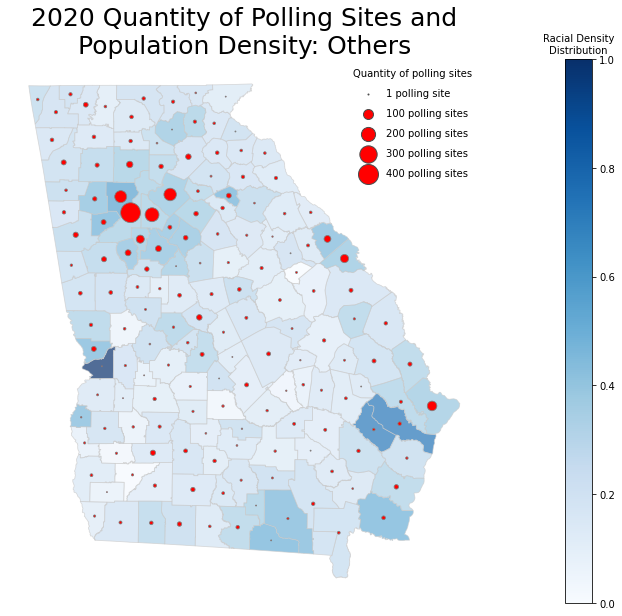

In [79]:
for i in ['Population Density: Hispanic', 'Population Density: White', 'Population Density: Black', 'Population Density: Asian', 'Population Density: Mixed', 'Population Density: Others']:
  fig, ax = plt.subplots(1, figsize=(30, 10))
  ax.axis('off')
  ax.set_title('2020 Quantity of Polling Sites and\n' +i, fontdict={'fontsize': '25', 'fontweight' : '3'})
  sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=1))
  fig.colorbar(sm).ax.set_title('Racial Density\nDistribution',fontsize=10)
  complete.plot(column=i, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', alpha=0.7)

  bubble.plot(column='2020 Quantity', marker='o', color='red', markersize='2020 Quantity', linewidth=0.8, ax=ax, edgecolor='0.5')

  plt.scatter([], [], color='red', edgecolor='0.3', s=1, alpha=1, label='1 polling site')
  plt.scatter([], [], color='red', edgecolor='0.3', s=100, alpha=1, label='100 polling sites')
  plt.scatter([], [], color='red', edgecolor='0.3', s=200, alpha=1, label='200 polling sites')
  plt.scatter([], [], color='red', edgecolor='0.3', s=300, alpha=1, label='300 polling sites')
  plt.scatter([], [], color='red', edgecolor='0.3', s=400, alpha=1, label='400 polling sites')
  plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Quantity of polling sites')
  

This step plots a bubble map with the polling site density in 2020 over a bivariate map representing the white and black racial density distribution. The size of each marker is proportionate to the polling site density in the county.

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning


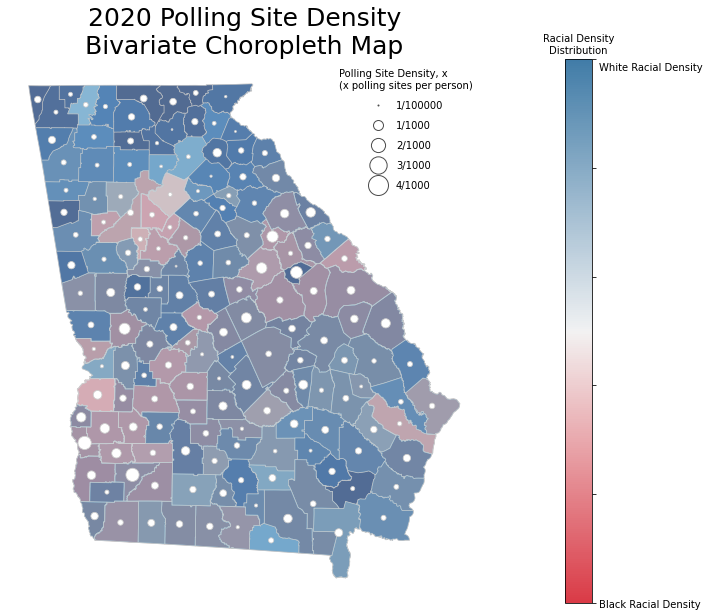

In [80]:
fig, ax = plt.subplots(1, figsize=(30, 10))
ax.axis('off')
ax.set_title('2020 Polling Site Density\nBivariate Choropleth Map', fontdict={'fontsize': '25', 'fontweight' : '3'})
sm = plt.cm.ScalarMappable(cmap=redblue)
colorbar=fig.colorbar(sm)
colorbar.ax.set_title('Racial Density\nDistribution',fontsize=10)
colorbar.ax.set_yticklabels(['Black Racial Density', '', '', '', '', '\nWhite Racial Density'])

complete.plot(column='Population Density: Black', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', alpha=1)
complete.plot(column='Population Density: White', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', alpha=0.7)
density.plot(column='Polling Site Density', marker='o', color='white', markersize='marker', linewidth=0.8, ax=ax, edgecolor='0.8')

plt.scatter([], [], color='white', edgecolor='0.3', s=1, alpha=1, label='1/100000')
plt.scatter([], [], color='white', edgecolor='0.3', s=100, alpha=1, label='1/1000')
plt.scatter([], [], color='white', edgecolor='0.3', s=200, alpha=1, label='2/1000')
plt.scatter([], [], color='white', edgecolor='0.3', s=300, alpha=1, label='3/1000')
plt.scatter([], [], color='white', edgecolor='0.3', s=400, alpha=1, label='4/1000')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Polling Site Density, x\n(x polling sites per person)')

This step plots the previous bubble map of the quantity of polling sites in 2020 over each racial density choropleth map (Hispanic, White, Black, Asian, Mixed, and Others) through a for loop.

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' o

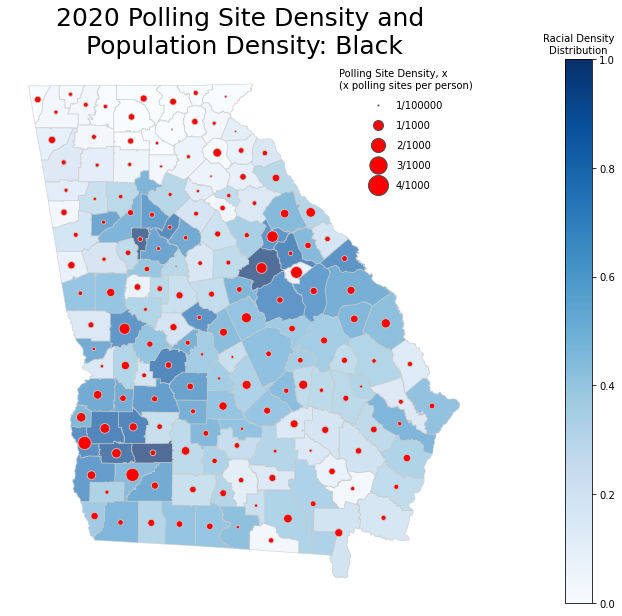

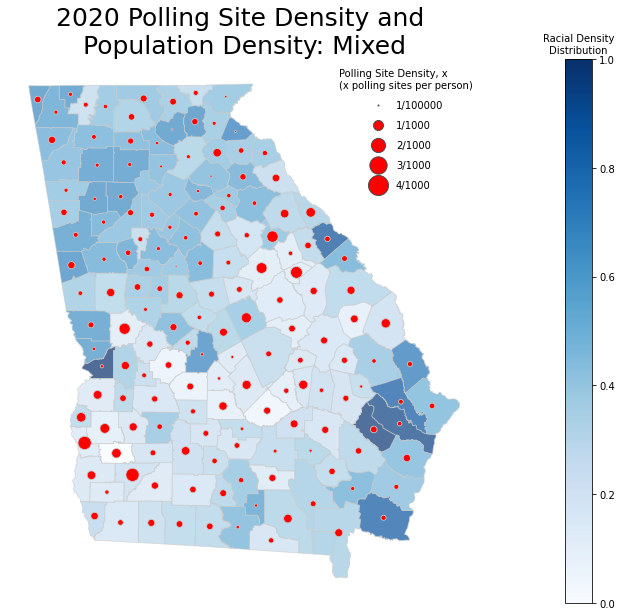

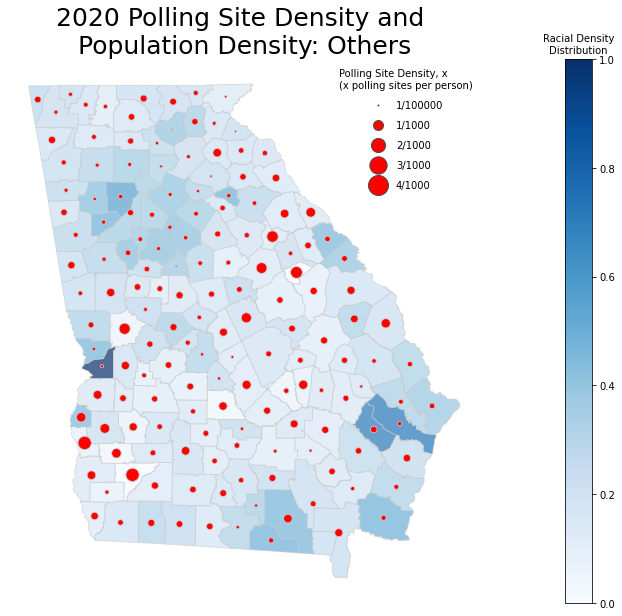

In [81]:
for i in ['Population Density: Hispanic', 'Population Density: White', 'Population Density: Black', 'Population Density: Asian', 'Population Density: Mixed', 'Population Density: Others']:
  fig, ax = plt.subplots(1, figsize=(30, 10))
  ax.axis('off')
  ax.set_title('2020 Polling Site Density and \n' + i, fontdict={'fontsize': '25', 'fontweight' : '3'})
  sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=1))
  fig.colorbar(sm).ax.set_title('Racial Density\nDistribution',fontsize=10)
  complete.plot(column=i, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', alpha=0.7)

  density.plot(column='Polling Site Density', marker='o', color='red', markersize='marker', linewidth=0.8, ax=ax, edgecolor='0.8')

  plt.scatter([], [], color='red', edgecolor='0.3', s=1, alpha=1, label='1/100000')
  plt.scatter([], [], color='red', edgecolor='0.3', s=100, alpha=1, label='1/1000')
  plt.scatter([], [], color='red', edgecolor='0.3', s=200, alpha=1, label='2/1000')
  plt.scatter([], [], color='red', edgecolor='0.3', s=300, alpha=1, label='3/1000')
  plt.scatter([], [], color='red', edgecolor='0.3', s=400, alpha=1, label='4/1000')
  plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Polling Site Density, x\n(x polling sites per person)')

This step plots a bubble map with the change in quantity of polling sites from 2018 to 2020 over a bivariate choropleth map representing the white and black racial density distribution. The size of each marker is proportionate to the change in the quantity of polling sites in the county.

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning


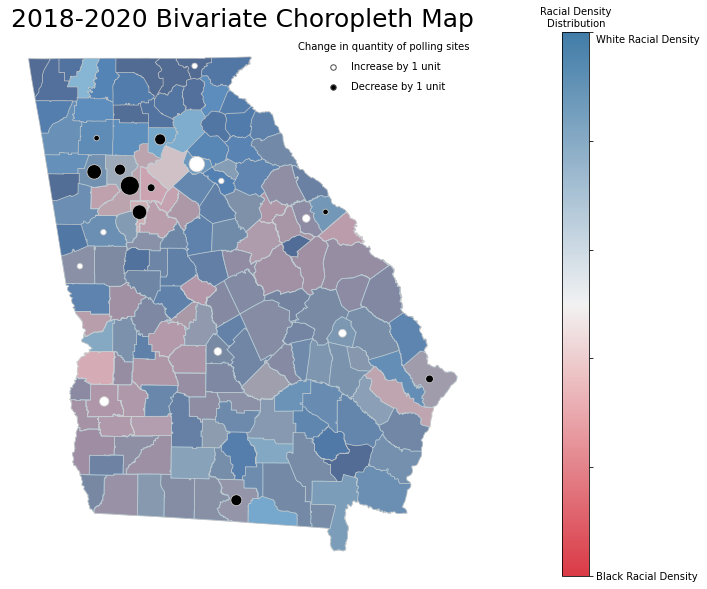

In [82]:
fig, ax = plt.subplots(1, figsize=(30, 10))
ax.axis('off')
ax.set_title('2018-2020 Bivariate Choropleth Map', fontdict={'fontsize': '25', 'fontweight' : '3'})
sm = plt.cm.ScalarMappable(cmap=redblue)
colorbar=fig.colorbar(sm)
colorbar.ax.set_title('Racial Density\nDistribution',fontsize=10)
colorbar.ax.set_yticklabels(['Black Racial Density', '', '', '', '', '\nWhite Racial Density'])

complete.plot(column='Population Density: Black', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', alpha=1)
complete.plot(column='Population Density: White', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', alpha=0.7)
decrease1820.plot(column='Delta 18-20', marker='o', color='black', markersize='decrease marker', linewidth=0.8, ax=ax, edgecolor='0.8')
increase1820.plot(column='Delta 18-20', marker='o', color='white', markersize='increase marker', linewidth=0.8, ax=ax, edgecolor='0.8')
plt.scatter([], [], color='white', edgecolor='0.3', s=30, alpha=1, label='Increase by 1 unit')
plt.scatter([], [], color='black', edgecolor='0.3', s=30, alpha=1, label='Decrease by 1 unit')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Change in quantity of polling sites')

This step plots a bubble map with the change in quantity of polling sites from 2016 to 2018 over a bivariate choropleth map representing the white and black racial density distribution. 

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning


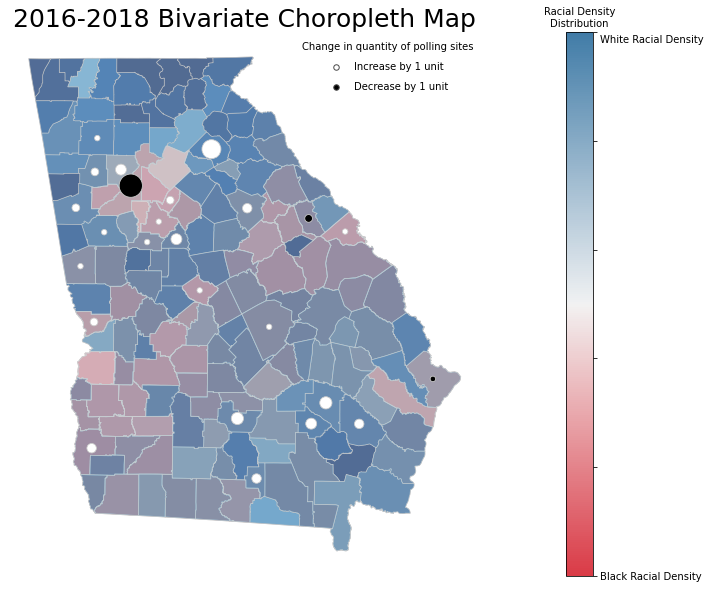

In [83]:
fig, ax = plt.subplots(1, figsize=(30, 10))
ax.axis('off')
ax.set_title('2016-2018 Bivariate Choropleth Map', fontdict={'fontsize': '25', 'fontweight' : '3'})
sm = plt.cm.ScalarMappable(cmap=redblue)
colorbar=fig.colorbar(sm)
colorbar.ax.set_title('Racial Density\nDistribution',fontsize=10)
colorbar.ax.set_yticklabels(['Black Racial Density', '', '', '', '', '\nWhite Racial Density'])

complete.plot(column='Population Density: Black', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', alpha=1)
complete.plot(column='Population Density: White', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', alpha=0.7)
decrease1618.plot(column='Delta 16-18', marker='o', color='black', markersize='decrease marker', linewidth=0.8, ax=ax, edgecolor='0.8')
increase1618.plot(column='Delta 16-18', marker='o', color='white', markersize='increase marker', linewidth=0.8, ax=ax, edgecolor='0.8')
plt.scatter([], [], color='white', edgecolor='0.3', s=30, alpha=1, label='Increase by 1 unit')
plt.scatter([], [], color='black', edgecolor='0.3', s=30, alpha=1, label='Decrease by 1 unit')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Change in quantity of polling sites')

This step plots a bubble map with the change in quantity of polling sites from 2016 to 2020 over a bivariate choropleth map representing the white and black racial density distribution. 

In [84]:
fig, ax = plt.subplots(1, figsize=(30, 10))
ax.axis('off')
ax.set_title('2016-2020 Bivariate Choropleth Map', fontdict={'fontsize': '25', 'fontweight' : '3'})
sm = plt.cm.ScalarMappable(cmap=redblue)
colorbar=fig.colorbar(sm)
colorbar.ax.set_title('Racial Density\nDistribution',fontsize=10)
colorbar.ax.set_yticklabels(['Black Racial Density', '', '', '', '', '\nWhite Racial Density'])

complete.plot(column='Population Density: Black', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', alpha=1)
complete.plot(column='Population Density: White', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', alpha=0.7)
decrease1620.plot(column='Delta 16-20', marker='o', color='black', markersize='decrease marker', linewidth=0.8, ax=ax, edgecolor='0.8')
increase1620.plot(column='Delta 16-20', marker='o', color='white', markersize='increase marker', linewidth=0.8, ax=ax, edgecolor='0.8')
plt.scatter([], [], color='white', edgecolor='0.3', s=30, alpha=1, label='Increase by 1 unit')
plt.scatter([], [], color='black', edgecolor='0.3', s=30, alpha=1, label='Decrease by 1 unit')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Change in quantity of polling sites')

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning


The following plots are bubble maps with the change in quantity of polling sites from 2018 to 2020 over a choropleth map of each racial density distribution (Hispanic, White, Black, Asian, Mixed, and Others).

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' o

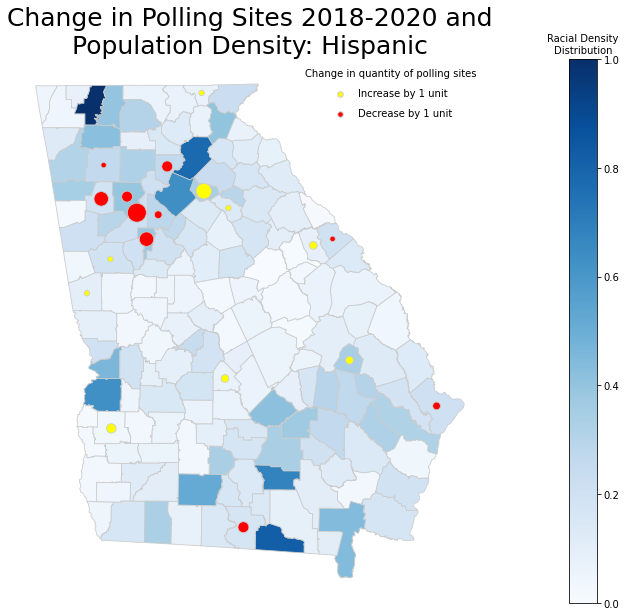

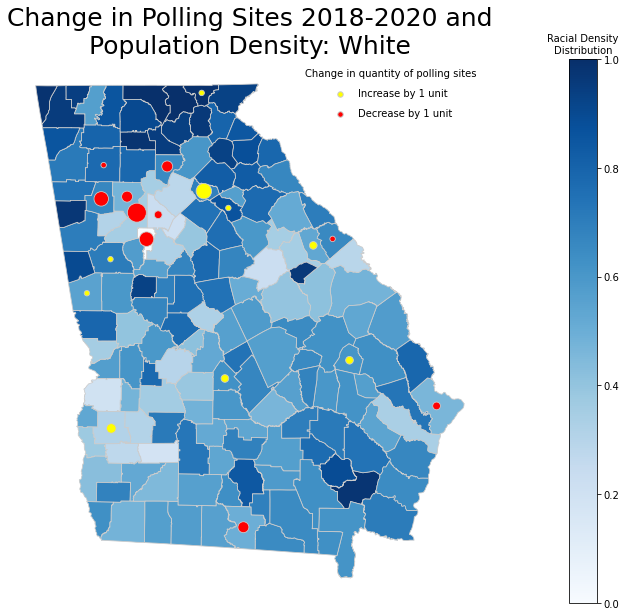

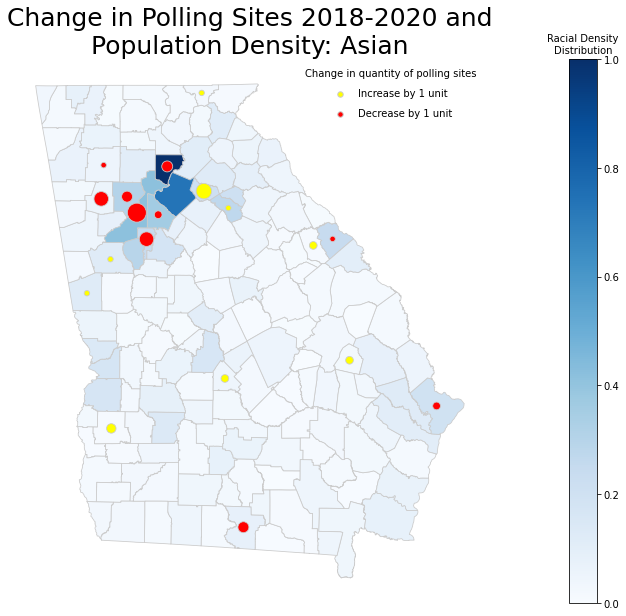

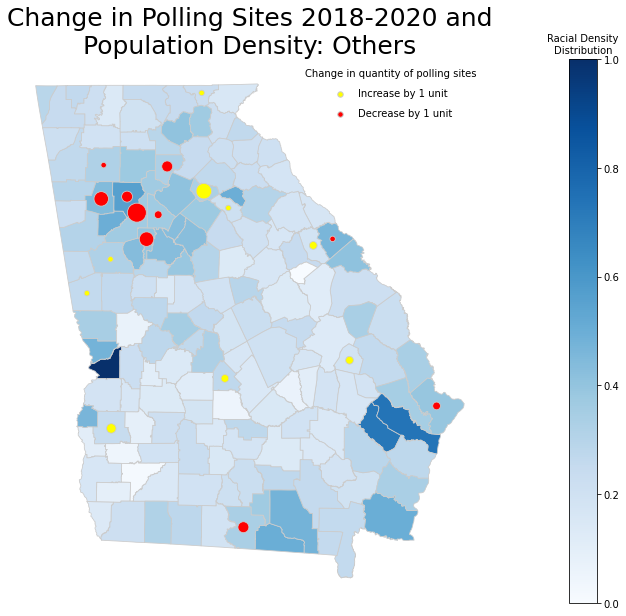

In [85]:
for i in ['Population Density: Hispanic', 'Population Density: White', 'Population Density: Black', 'Population Density: Asian', 'Population Density: Mixed', 'Population Density: Others']:
  fig, ax = plt.subplots(1, figsize=(30, 10))
  ax.axis('off')
  ax.set_title('Change in Polling Sites 2018-2020 and\n' + i, fontdict={'fontsize': '25', 'fontweight' : '3'})
  sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=1))
  fig.colorbar(sm).ax.set_title('Racial Density\nDistribution',fontsize=10)

  complete.plot(column=i, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
  decrease1820.plot(column='Delta 18-20', marker='o', color='Red', markersize='decrease marker', linewidth=0.8, ax=ax, edgecolor='0.8')
  increase1820.plot(column='Delta 18-20', marker='o', color='Yellow', markersize='increase marker', linewidth=0.8, ax=ax, edgecolor='0.8')
  plt.scatter([], [], color='yellow', edgecolor='0.8', s=30, alpha=1, label='Increase by 1 unit')
  plt.scatter([], [], color='red', edgecolor='0.8', s=30, alpha=1, label='Decrease by 1 unit')
  plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Change in quantity of polling sites')

The following plots are bubble maps with the change in quantity of polling sites from 2016 to 2018 over a choropleth map of each racial density distribution (Hispanic, White, Black, Asian, Mixed, and Others).

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' o

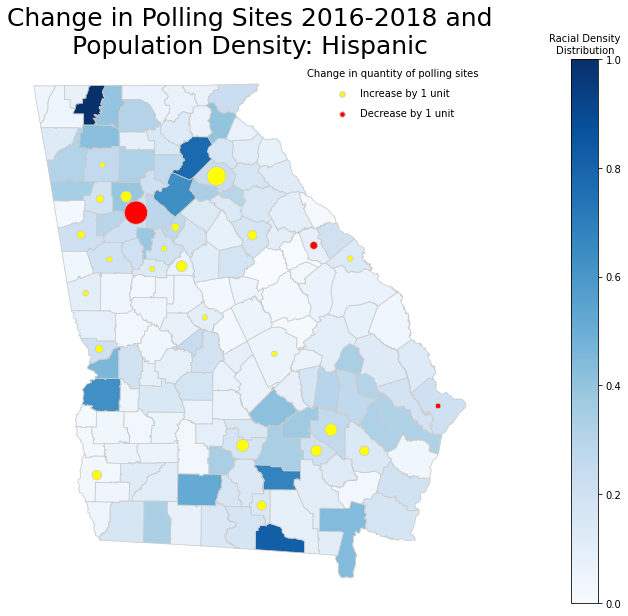

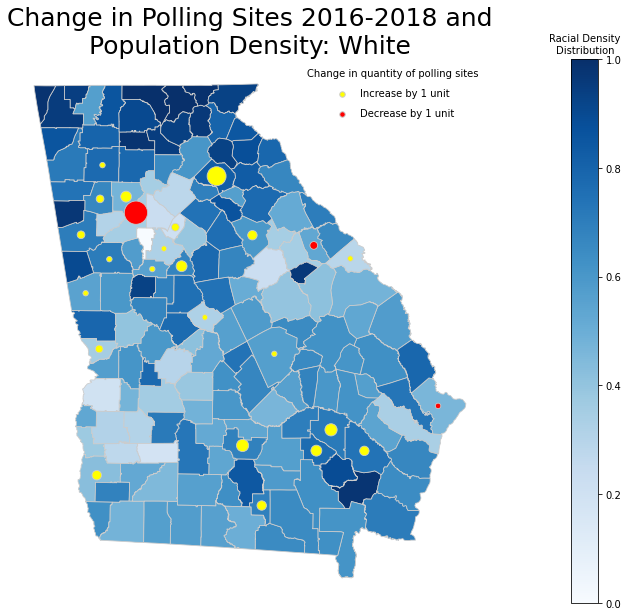

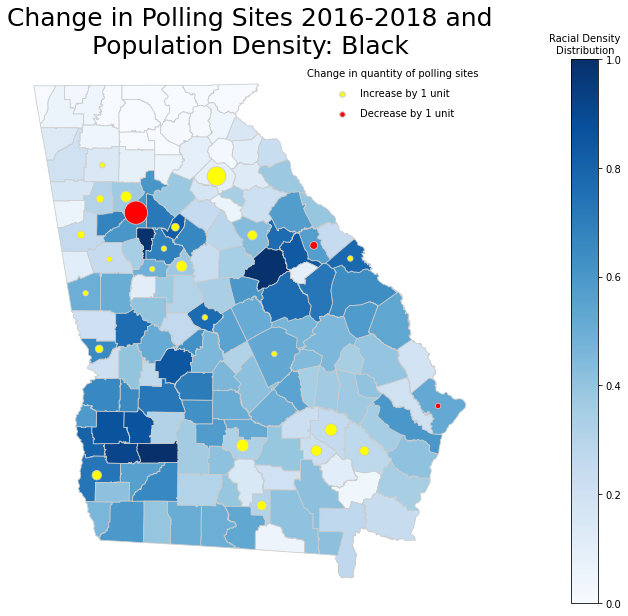

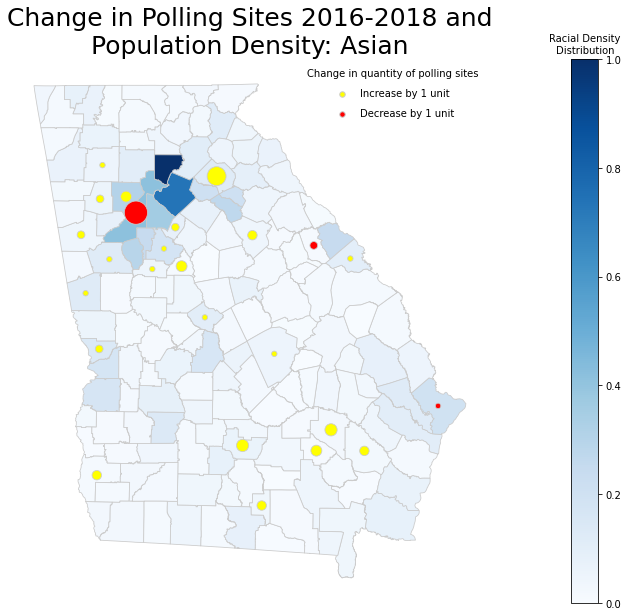

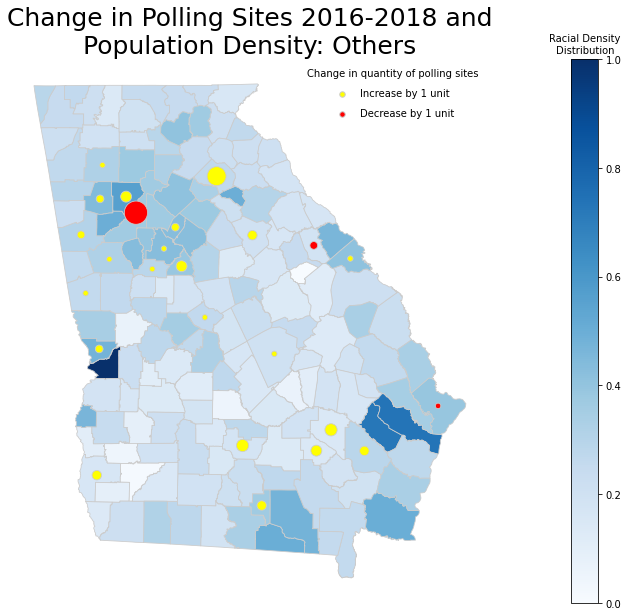

In [86]:
for i in ['Population Density: Hispanic', 'Population Density: White', 'Population Density: Black', 'Population Density: Asian', 'Population Density: Mixed', 'Population Density: Others']:
  fig, ax = plt.subplots(1, figsize=(30, 10))
  ax.axis('off')
  ax.set_title('Change in Polling Sites 2016-2018 and\n' + i, fontdict={'fontsize': '25', 'fontweight' : '3'})
  sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=1))
  fig.colorbar(sm).ax.set_title('Racial Density\nDistribution',fontsize=10)

  complete.plot(column=i, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
  decrease1618.plot(column='Delta 16-18', marker='o', color='Red', markersize='decrease marker', linewidth=0.8, ax=ax, edgecolor='0.8')
  increase1618.plot(column='Delta 16-18', marker='o', color='Yellow', markersize='increase marker', linewidth=0.8, ax=ax, edgecolor='0.8')
  plt.scatter([], [], color='yellow', edgecolor='0.8', s=30, alpha=1, label='Increase by 1 unit')
  plt.scatter([], [], color='red', edgecolor='0.8', s=30, alpha=1, label='Decrease by 1 unit')
  plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Change in quantity of polling sites')

The following plots are bubble maps with the change in quantity of polling sites from 2016 to 2020 over a choropleth map of each racial density distribution (Hispanic, White, Black, Asian, Mixed, and Others).

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' o

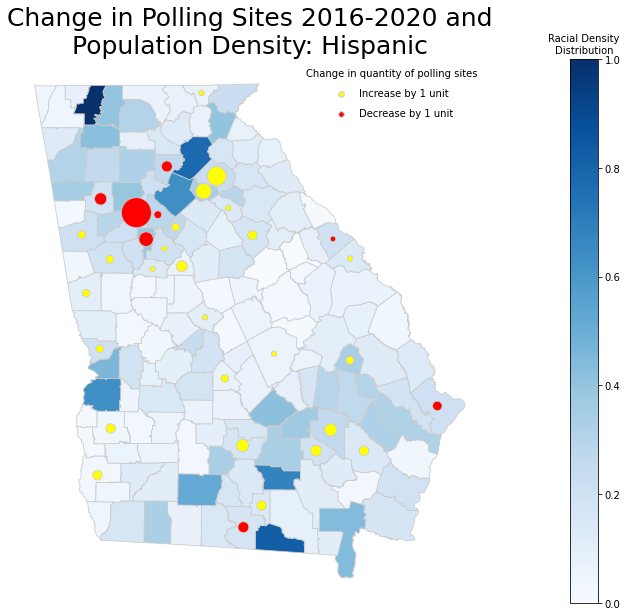

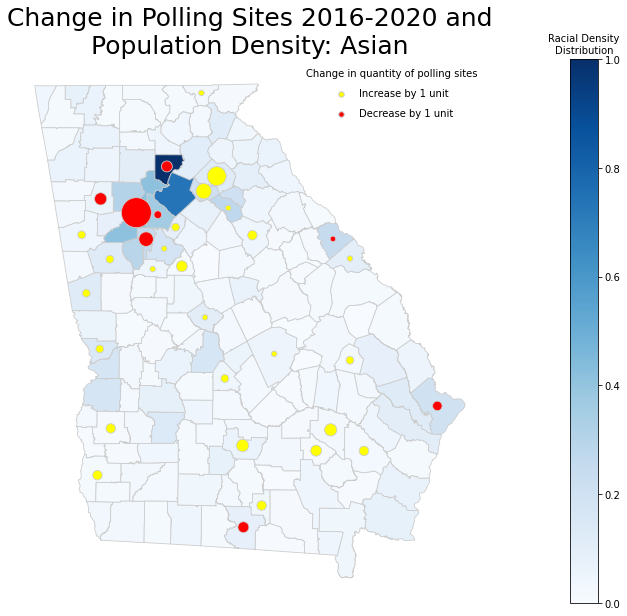

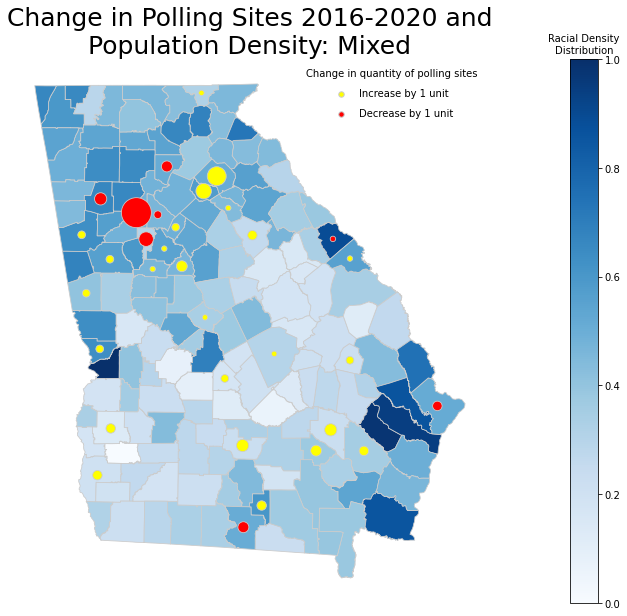

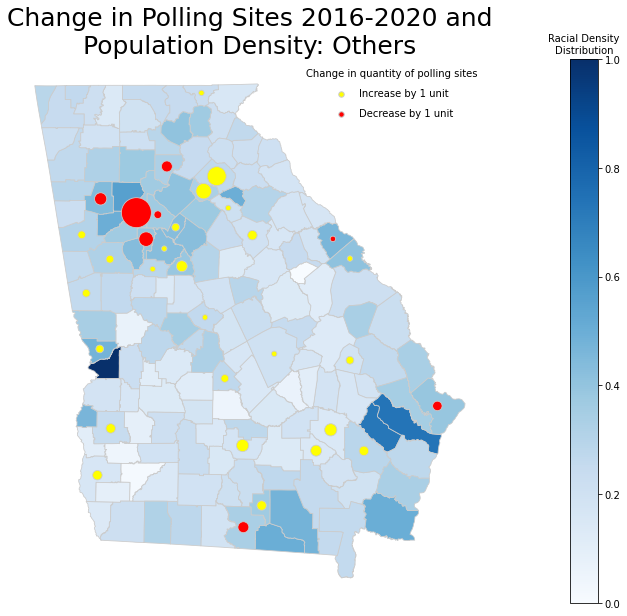

In [87]:
for i in ['Population Density: Hispanic', 'Population Density: White', 'Population Density: Black', 'Population Density: Asian', 'Population Density: Mixed', 'Population Density: Others']:
  fig, ax = plt.subplots(1, figsize=(30, 10))
  ax.axis('off')
  ax.set_title('Change in Polling Sites 2016-2020 and\n' + i, fontdict={'fontsize': '25', 'fontweight' : '3'})
  sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=1))
  fig.colorbar(sm).ax.set_title('Racial Density\nDistribution',fontsize=10)

  complete.plot(column=i, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
  decrease1620.plot(column='Delta 16-20', marker='o', color='Red', markersize='decrease marker', linewidth=0.8, ax=ax, edgecolor='0.8')
  increase1620.plot(column='Delta 16-20', marker='o', color='Yellow', markersize='increase marker', linewidth=0.8, ax=ax, edgecolor='0.8')
  plt.scatter([], [], color='yellow', edgecolor='0.8', s=30, alpha=1, label='Increase by 1 unit')
  plt.scatter([], [], color='red', edgecolor='0.8', s=30, alpha=1, label='Decrease by 1 unit')
  plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Change in quantity of polling sites')

This step calculates the Spearman rank correlation coefficient and p-value between the quantity of polling sites in 2020 and each racial density (Hispanic, White, Black, Asian, Mixed, and Others). This will identify whether there is covariation.

This step identifies whether the quantity of polling sites in each county is associated and covaries with t:he racial density of a particular race.

The method to calculate the the Spearman rank correlation coefficient and p-value uses the SciPy library and was learned from the following source: [(Zverkova, 2020)](https://re-thought.com/exploring-correlation-in-python/)

In [88]:
#creating empty lists for the values in the dataframe.
# 'name' is for the race, 'c' is for the correlation coefficient, 'p' is for the p-value.
name = []
c = []
p = []

#using a for loop to calculate the spearman rank coefficient and p-value for each list and appending the value to the associated list.
for i in ['Population Density: Hispanic', 'Population Density: White', 'Population Density: Black', 'Population Density: Asian', 'Population Density: Mixed', 'Population Density: Others']:
  corr, pvalue = scipy.stats.spearmanr(complete[[i, '2020 Quantity']])
  name.append(i)
  c.append(corr)
  p.append(pvalue)

#creating the dataframe.
data = {'Race': name, 'Correlation Coefficient': c, 'P-value': p}
quantity_test = pd.DataFrame(data)
quantity_test = quantity_test.style.set_caption('Spearman Rank Correlation on 2020 Quantity of Polling Sites and Racial Density by County')

quantity_test

This step calculates the Spearman rank correlation coefficient and p-value between the polling site density in 2020 and each racial density (Hispanic, White, Black, Asian, Mixed, and Others).

In [89]:
#creating empty lists for the values in the dataframe.
# 'name' is for the race, 'c' is for the correlation coefficient, 'p' is for the p-value.
name = []
c = []
p = []

#using a for loop to calculate the spearman rank coefficient and p-value for each list and appending the value to the associated list.
for i in ['Population Density: Hispanic', 'Population Density: White', 'Population Density: Black', 'Population Density: Asian', 'Population Density: Mixed', 'Population Density: Others']:
  corr, pvalue = scipy.stats.spearmanr(complete[[i, 'Polling Site Density']])
  name.append(i)
  c.append(corr)
  p.append(pvalue)

#creating the dataframe.
data = {'Race': name, 'Correlation Coefficient': c, 'P-value': p}
quantity_test = pd.DataFrame(data)
quantity_test = quantity_test.style.set_caption('Spearman Rank Correlation on 2020 Polling Site Density and Racial Density by County')

quantity_test

This step calculates the Spearman rank correlation coefficient and p-value between the change the quantity of polling sites from **2018 to 2020** and each racial density (Hispanic, White, Black, Asian, Mixed, and Others).

The following tables represent whether the change in the quantity of polling sites in each county is associated and covaries with the racial density of a particular race.


In [90]:
name = []
c = []
p = []

for i in ['Population Density: Hispanic', 'Population Density: White', 'Population Density: Black', 'Population Density: Asian', 'Population Density: Mixed', 'Population Density: Others']:
  corr, pvalue = scipy.stats.spearmanr(complete[[i, 'Delta 18-20']])
  name.append(i)
  c.append(corr)
  p.append(pvalue)

data = {'Race': name, 'Correlation Coefficient': c, 'P-value': p}
delta1820_test = pd.DataFrame(data)
delta1820_test = delta1820_test.style.set_caption('Spearman Rank Correlation on the Change in the Quantity of Polling Sites from 2018 to 2020 and Racial Density by County')

delta1820_test

This step calculates the Spearman rank correlation coefficient and p-value between the change the quantity of polling sites from **2016 to 2018** and each racial density (Hispanic, White, Black, Asian, Mixed, and Others).

In [91]:
name = []
c = []
p = []

for i in ['Population Density: Hispanic', 'Population Density: White', 'Population Density: Black', 'Population Density: Asian', 'Population Density: Mixed', 'Population Density: Others']:
  corr, pvalue = scipy.stats.spearmanr(complete[[i, 'Delta 16-18']])
  name.append(i)
  c.append(corr)
  p.append(pvalue)

data = {'Race': name, 'Correlation Coefficient': c, 'P-value': p}
delta1628_test = pd.DataFrame(data)
delta1628_test = delta1628_test.style.set_caption('Spearman Rank Correlation on the Change in the Quantity of Polling Sites from 2016 to 2018 and Racial Density by County')

delta1628_test

This step calculates the Spearman rank correlation coefficient and p-value between the change the quantity of polling sites from **2016 to 2020** and each racial density (Hispanic, White, Black, Asian, Mixed, and Others).

In [92]:
name = []
c = []
p = []

for i in ['Population Density: Hispanic', 'Population Density: White', 'Population Density: Black', 'Population Density: Asian', 'Population Density: Mixed', 'Population Density: Others']:
  corr, pvalue = scipy.stats.spearmanr(complete[[i, 'Delta 16-20']])
  name.append(i)
  c.append(corr)
  p.append(pvalue)

data = {'Race': name, 'Correlation Coefficient': c, 'P-value': p}
delta1620_test = pd.DataFrame(data)
delta1620_test = delta1620_test.style.set_caption('Spearman Rank Correlation on the Change in the Quantity of Polling Sites from 2016 to 2020 and Racial Density by County')

delta1620_test

Citations:

Campus.datacamp.com. 2019. Bivariate Map of Broadband Access | Python. [online] Available at: <https://campus.datacamp.com/courses/analyzing-us-census-data-in-python/american-community-survey?ex=12> [Accessed 4 December 2021].

Coderzcolumn.com. 2021. Geoplot - Scatter & Bubble Maps [Python] by Sunny Solanki. [online] Available at: <https://coderzcolumn.com/tutorials/data-science/geoplot-scatter-and-bubble-maps-python> [Accessed 8 December 2021].

Geopandas.org. 2013. GeoPandas. [online] Available at: <https://geopandas.org/en/stable/> [Accessed 10 September 2021].

Linggar, R., 2019. A Beginners Guide to Create a Cloropleth Map in Python using GeoPandas and Matplotlib. [online] Towards Data Science. Available at: <https://towardsdatascience.com/a-beginners-guide-to-create-a-cloropleth-map-in-python-using-geopandas-and-matplotlib-9cc4175ab630> [Accessed 1 November 2021].

Matplotlib.org. 2021. Matplotlib — Visualization with Python. [online] Available at: <https://matplotlib.org/> [Accessed 10 September 2021].

Numpy.org. 2021. NumPy. [online] Available at: <https://numpy.org/> [Accessed 10 September 2021].

Pandas.pydata.org. 2021. pandas - Python Data Analysis Library. [online] Available at: <https://pandas.pydata.org/> [Accessed 10 September 2021].

PyPI. 2017. descartes. [online] Available at: <https://pypi.org/project/descartes/> [Accessed 10 September 2021].

Seaborn.pydata.org. 2020. seaborn.diverging_palette — seaborn 0.11.2 documentation. [online] Available at: <https://seaborn.pydata.org/generated/seaborn.diverging_palette.html#seaborn.diverging_palette> [Accessed 1 January 2022].

VanderPlas, J., 2016. Customizing Plot Legends | Python Data Science Handbook. [online] Jakevdp.github.io. Available at: <https://jakevdp.github.io/PythonDataScienceHandbook/04.06-customizing-legends.html> [Accessed 17 December 2021].

Zverkova, A., 2020. Exploring Correlation in Python: Pandas, SciPy. [online] Re-thought. Available at: <https://re-thought.com/exploring-correlation-in-python/> [Accessed 10 December 2021].